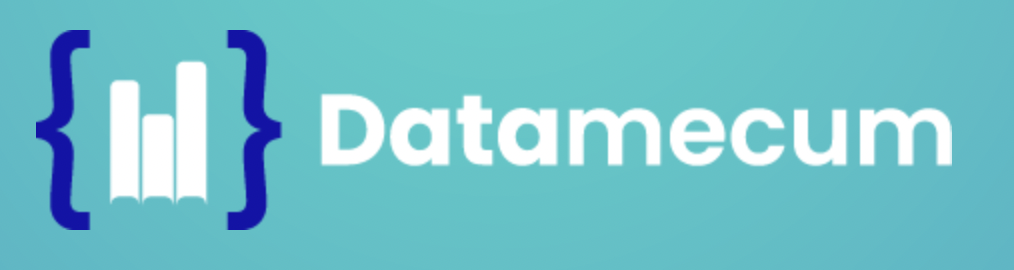
<font color="#CA3532"><h1 align="left">Programa técnico intensivo en data science. Datamecum.</h1></font>
<font color="#6E6E6E"><h2 align="left">Módulo Aprendizaje no supervisado.</h2></font>
#### José María Martínez Martínez

# Fuzzy C-Means Clustering en Python

## Instalación de dependencias


Primero instala las dependencias (`requirements.txt`)

In [ ]:
! python3 -m pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 9.2 MB/s 
     |████████████████████████████████| 121 kB 60.8 MB/s 
     |████████████████████████████████| 1.6 MB 58.0 MB/s 
     |████████████████████████████████| 83 kB 2.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=a9f7d516a0ce2760359fde2d33f71cab5b12cc999b4888e4785aeb79538d50d4
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [ ]:
import sklearn

sklearn.__version__

'1.0.2'

## Creación del conjunto de datos sintético
Lo primero que vamos a hacer es crear un conjunto de datos a través del módulo `makes_moon` importado desde `sklearn.datasets`. Para ello importa dicho módulo y usa la función `make_moons()` para generar 250 datos sintéticos en forma de media luna añadiendo ruido gausiano con desviación estandar igual a 0.05:

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()
from sklearn.datasets import make_moons

features, true_labels = make_moons(n_samples=250, noise=0.05, random_state=42)

Estandariza las variables para que tengan media cero y desviación estándar 1. Para ello utiliza la función `StandardScaler` del módulo `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

Dibuja el conjunto de datos anterior diferenciando cada clase por colores:

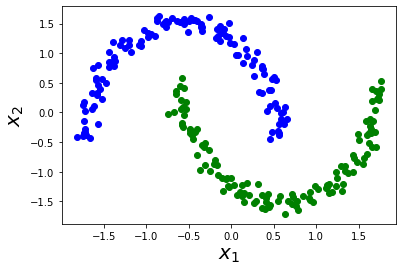

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(scaled_features[(true_labels == 0), 0], scaled_features[(true_labels == 0), 1], color="blue")
plt.scatter(scaled_features[(true_labels == 1), 0], scaled_features[(true_labels == 1), 1], color="green")

# X contains two features, x1 and x2
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20)

# Displaying the plot.
plt.show()

## Clustering
Estos son nuestros datos de prueba. Tenemos 2 medias lunas. Sin embargo, ¿qué pasaría si no supiéramos cuántos clusters deberíamos esperar? ¿Quizás si los datos no estuvieran tan claramente agrupados?

Intentemos agrupar nuestros datos varias veces, con entre 2 y 10 clusters. Para ello utiliza `fuzz.cluster.cmeans()`. A esta función se le pasan 7 parámetros de entrada y devuelve otros 7. A continuación se muestra una imagen de la documentación:

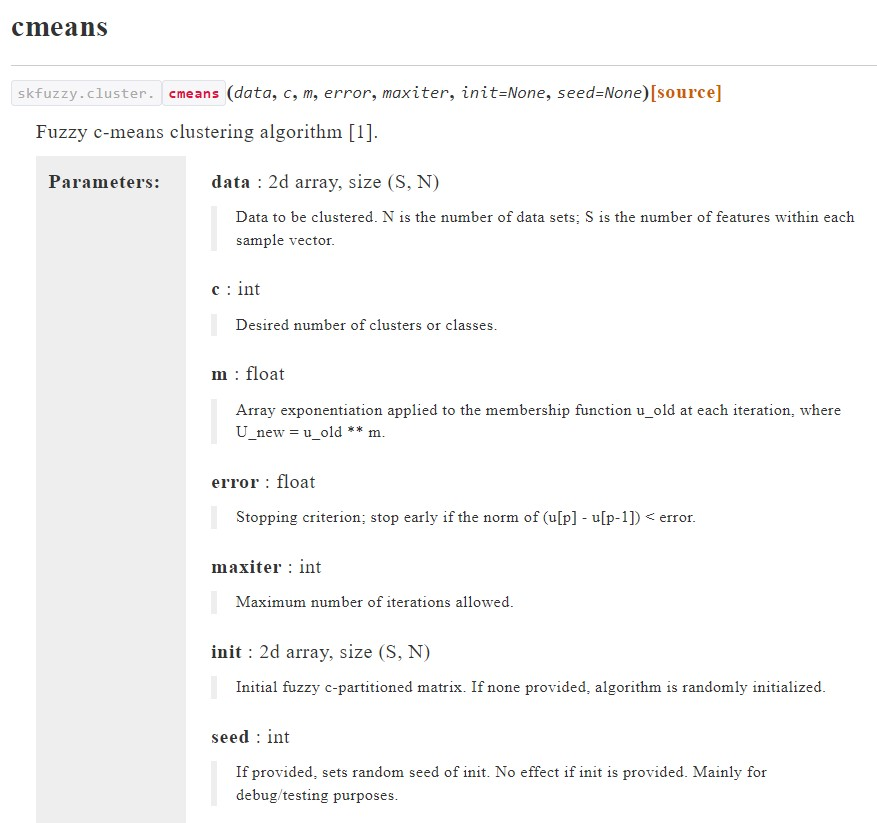

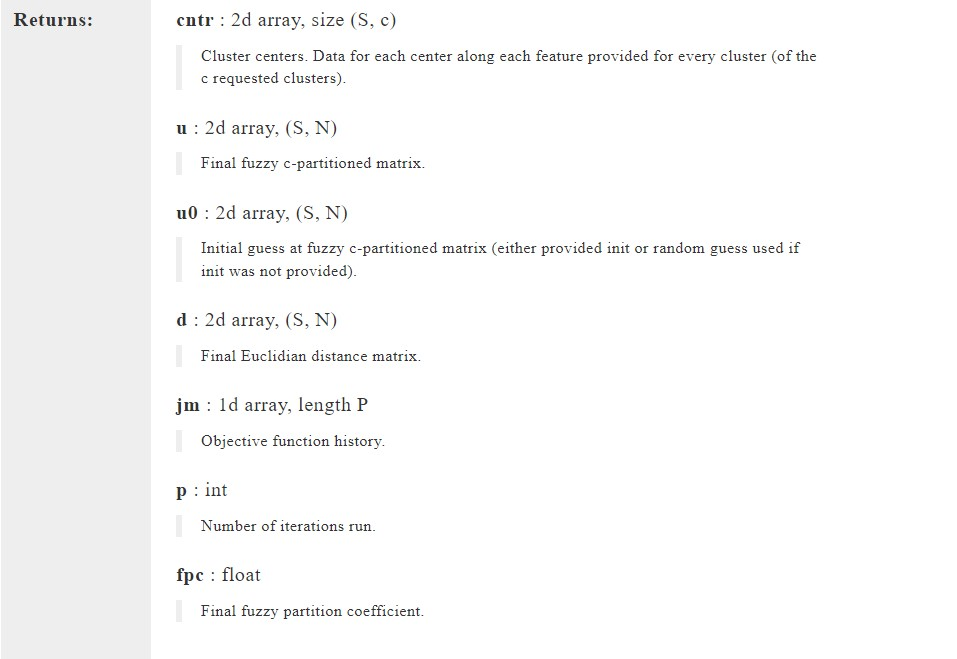

Utiliza la ayuda anterior para agrupar los datos anteriores entre 2 y 10 clusters para ver los resultados. Para ello, representa en una gráfica de 3x3 cada no de los resultados obtenidos variando el número de clusters. Representa cada agrupación de un color distinto y dibuja los centroides obtenidos por el algoritmo.

In [1]:
# Set up the loop and plot
import skfuzzy as fuzz
import numpy as np
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
data = scaled_features.T
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):

        ax.plot(data[0,(cluster_membership == j)],
                data[1,(cluster_membership == j)], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')

fig1.tight_layout()

ModuleNotFoundError: ignored

Comprueba que la "fuzzy c partitioned matrix" obtenida para el último caso (10 centroides) tiene las dimensiones que esperas ¿Qué representa la primera columna de esta matriz?

In [ ]:
u.shape

(10, 250)

Realiza la suma de lo elementos de la primera columna ¿Qué valor te da?¿Te cuadra?

In [ ]:
np.sum(u[:,0])

1.0000000000000002

A continuacón suma la pertenencia a los clusters para cada centroide y saca su valor por pantalla ¿Te cuadran los valores?

In [ ]:
for n in range(len(u)):
  print(f"La suma de pertenencia a clusters para el centroide {n} es {np.sum(u[:,n])}")

La suma de pertenencia a clusters para el centroide 0 es 1.0000000000000002
La suma de pertenencia a clusters para el centroide 1 es 1.0000000000000002
La suma de pertenencia a clusters para el centroide 2 es 0.9999999999999999
La suma de pertenencia a clusters para el centroide 3 es 1.0000000000000002
La suma de pertenencia a clusters para el centroide 4 es 1.0000000000000002
La suma de pertenencia a clusters para el centroide 5 es 1.0
La suma de pertenencia a clusters para el centroide 6 es 1.0
La suma de pertenencia a clusters para el centroide 7 es 1.0
La suma de pertenencia a clusters para el centroide 8 es 0.9999999999999999
La suma de pertenencia a clusters para el centroide 9 es 1.0


El coeficiente de partición difusa (CPF) en inglés Fuzzy Partition Coefficient (FPC) se define en un intervalo de 0 a 1, siendo 1 el mejor. Es una métrica que nos indica como de bien un determinado modelo describe nuestros datos. Muestra los resultados de la agrupación representando en una gráfica el coeficiente de partición difusa. Cuando el CPF es máximo, nuestros datos se describen mejor. Comprueba que, efectivamente, el máximo se obtiene para dos agrupaciones (recordad que el conjunto de datos creado tiene dos grupos correspondientes a dos medias lunas).

Text(0, 0.5, 'Fuzzy partition coefficient')

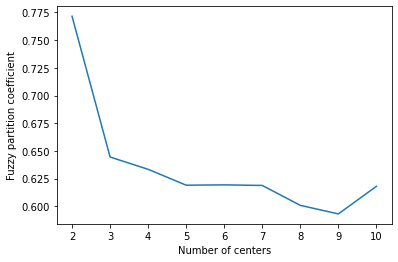

In [ ]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")